--- First 5 Rows ---
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-coun

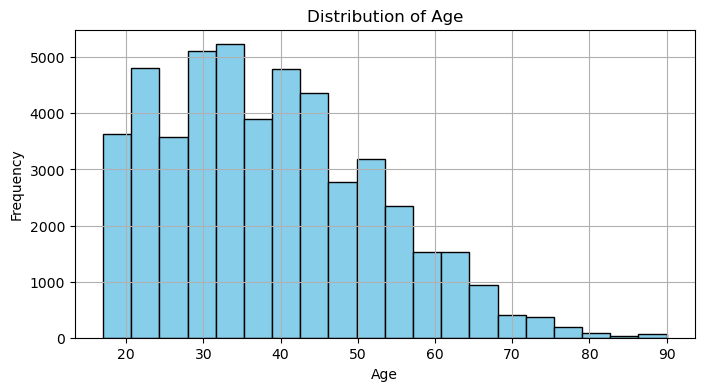

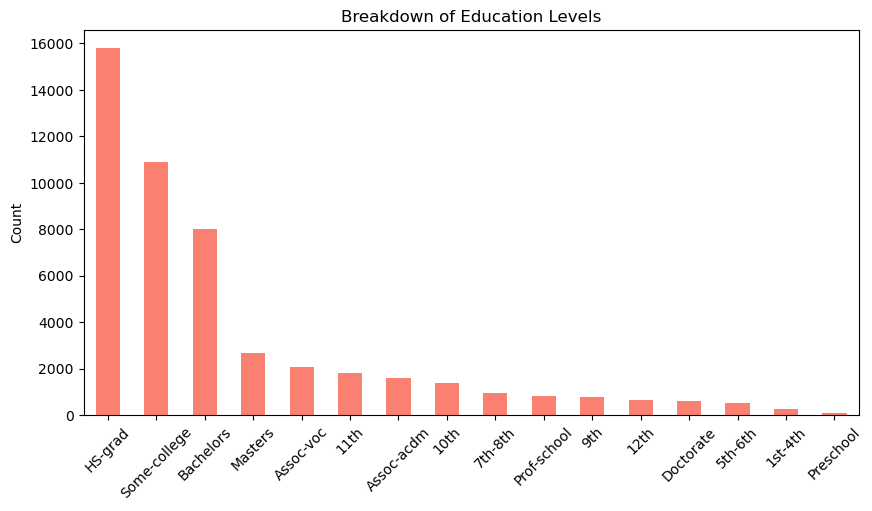


New features created. Current shape of dataframe: (48842, 23)
--- Model Results ---
Model Accuracy: 0.8595

Interpretation:
The model successfully predicts income levels with 85.95% accuracy.


In [14]:
# environment setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
data = fetch_openml(name='adult', version=2, as_frame=True, parser='auto')
frame = data.frame

# print the first few lines
print("--- First 5 Rows ---")
print(frame.head())

print("\n--- Summary Statistics ---")
print(frame.describe())

#sort features
numeric_features = frame.select_dtypes(include=['number']).columns.tolist()
categorical_features = frame.select_dtypes(include=['category', 'object']).columns.tolist()

print(f"\nNumerical features: {numeric_features}")
print(f"Categorical features: {categorical_features}")

# age distribution chart
plt.figure(figsize=(8, 4))
frame['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Education chart
plt.figure(figsize=(10, 5))
frame['education'].value_counts().plot(kind='bar', color='salmon')
plt.title('Breakdown of Education Levels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# encoding prep
frame_final = pd.get_dummies(frame, columns=['workclass'])

frame_final['age_bins'] = pd.cut(frame_final['age'], 
                                 bins=[0, 25, 45, 65, 100], 
                                 labels=['Young', 'Middle', 'Senior', 'Retired'])

print("\nNew features created. Current shape of dataframe:", frame_final.shape)

# feature prep
X_data = pd.get_dummies(frame_final.drop(columns=['class']))
y_data = frame_final['class']

# split for training
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42)
    
# train
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# check accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"--- Model Results ---")
print(f"Model Accuracy: {accuracy:.4f}")
print("\nInterpretation:")
print(f"The model successfully predicts income levels with {accuracy*100:.2f}% accuracy.")

What was challenging or surprising about feature engineering?
This is all pretty challenging. I understand encoding, but I am still trying to grasp how that effects dimensionality

How did your choices affect model performance?
I have no idea. If I understand correctly one hot encoding creates a high number of features, and using a random forest classifier handles that better?

How could you improve your workflow or analysis next time?
I am not sure, at this point all I can really do is follow along.

